In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import extract_stores

from PyDyGraphs import pydygraphs

# PyDyGraph cloned from git@github.com:minhnh/PyDyGraphs.git (modified some to work with Python 3)

%matplotlib inline


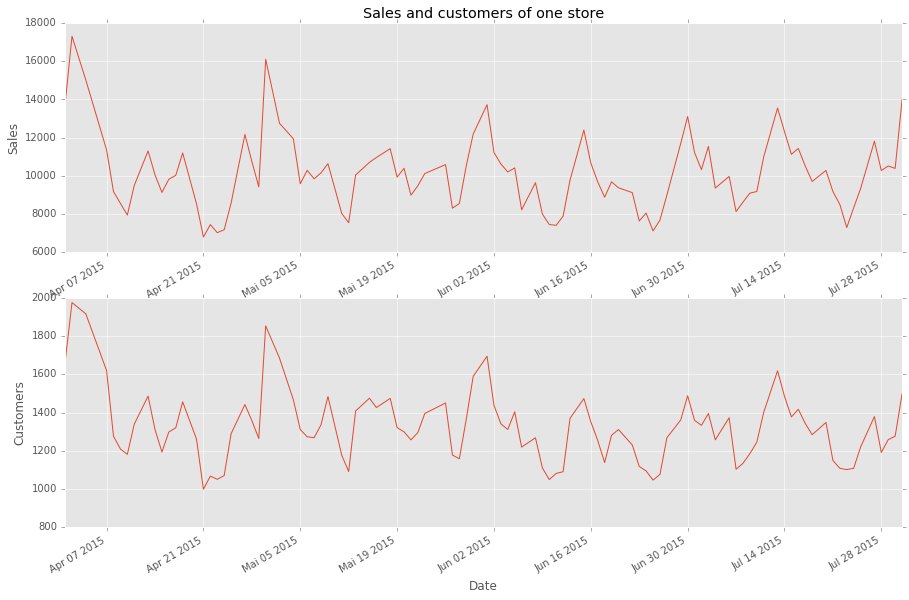

In [32]:
store_data = extract_stores.load_data_file("data/train_small.csv", extract_stores.DTYPE_TRAIN)

single_store = store_data.loc[store_data['Store'] == store_data["Store"][0]]
single_store = single_store.loc[store_data['Open'] == 1]

plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)
single_store[:100].plot("Date", "Sales")
plt.title('Sales and customers of one store')
plt.ylabel('Sales')
plt.subplot(2, 1, 2)
single_store[:100].plot("Date", "Customers")
plt.ylabel('Customers')
plt.show()


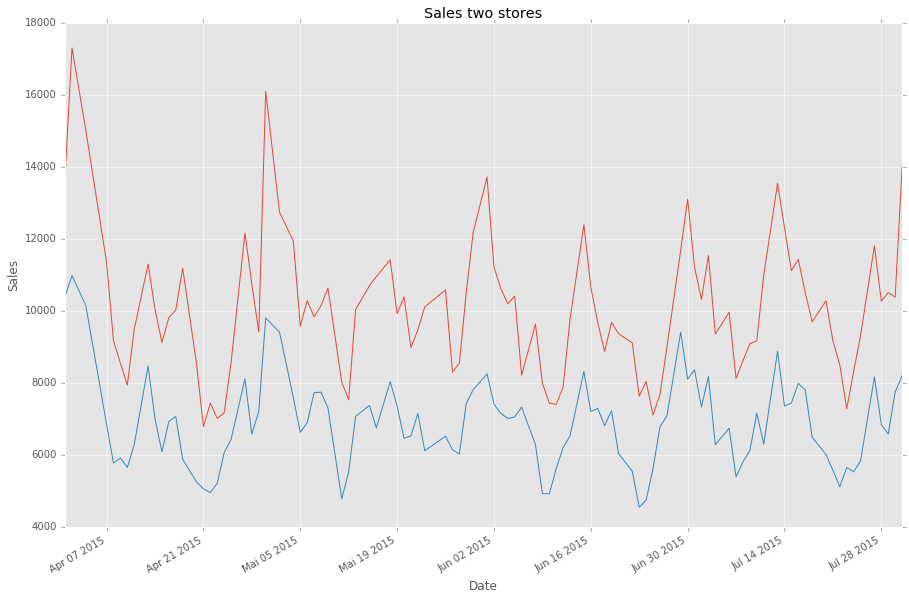

In [35]:

single_store_1 = store_data.loc[store_data['Store'] == store_data["Store"][0]]
single_store_2 = store_data.loc[store_data['Store'] == store_data["Store"][1]]
single_store_1 = single_store_1.loc[store_data['Open'] == 1]
single_store_2 = single_store_2.loc[store_data['Open'] == 1]

plt.figure(figsize=(15,10))
single_store_1[:100].plot("Date", "Sales")
single_store_2[:100].plot("Date", "Sales")
plt.title('Sales two stores')
plt.ylabel('Sales')
plt.show()


In [33]:
# So I spent a lot of time trying to get the PyDyPlot to work, but it turns out the image doesn't show when I
# try to download the notebook as PDF, or right click save image. So I'm including this in my submission.

x_raw = single_store['Date'].get_values()
day_zero = x_raw[-1]
x = np.zeros(len(x_raw))
for i in range(len(x_raw)):
    x[i] = (x_raw[i] - day_zero).astype('timedelta64[D]').astype(int)

x = x[::-1]

def normalize(array):
    return (array - np.mean(array)) / np.std(array)

y1 = single_store['Sales'].get_values()
y1 = normalize(y1)[::-1]
y2 = single_store['Customers'].get_values()
y2 = normalize(y2)[::-1]

# Plot by date, sales and customers number are normalized
fig.title("Normalized number of sales and customers for one store")
fig.plot(x, [y1, y2], ylabels=['Sales', 'Customers'], color=['navy','magenta'], rangeselector=True)
fig.show()


In [40]:
# Plot normalized sales of two stores
y1 = single_store_1['Sales'].get_values()
y1 = normalize(y1)[::-1]
y2 = single_store_2['Customers'].get_values()
y2 = normalize(y2)[::-1]

labels = [None, None]
labels[0] = "Store %d" % (store_data["Store"][0])
labels[1] = "Store %d" % (store_data["Store"][1])

# Plot by date, sales and customers number are normalized
fig.title("Normalized number of sales for two stores")
fig.plot(x, [y1, y2], ylabels=labels, color=['navy','magenta'], rangeselector=True)
fig.show()


In [28]:
# Plot using the plotDataFrame function

fig = pydygraphs.figure(width = 800, height = 600)
xaxis = "Date"

fig.plotDataFrame(single_store, xaxis, rangeselector=True)
fig.xlabel('Date')
fig.ylabel('Sales')

# Show figure:
fig.show()

""
""
